In [2]:
import time 
import sys
from blu import *  
# True parameters
data=np.load(data_dir+'/catalog/m1m2zxeff_posterior_138_lensed.npz')
m1,m2,redshift,xeff = data['m1'],data['m2'],data['redshift'], data['xeff'] 
del data
# posterior samples 
with open('./posterior/img1_det_m1m2xeff.pkl', 'rb') as f:
    img1=dill.load(f)
with open('./posterior/img2_det_m1m2xeff.pkl', 'rb') as f:
    img2=dill.load(f)
# population models 

# uniform distribution
with open('./pop_prior/uniform_pop_m1m2xeff.pkl', 'rb') as f:
    pop_uni=dill.load(f)
with open('./pop_prior/astro_m1m2chieff.pkl', 'rb') as f:
    pop_model=dill.load(f)

pop_true = mix_pop('./pop_prior/real_dist.pkl')
pop_power = mix_pop('./pop_prior/PL_pdf.pkl',wide=True)
N = 2e4
OLU = OddsRatio(gw_pop=pop_model,Nmc=N)
OLU_true = OddsRatio(gw_pop=pop_true,Nmc=N)
OLU_pl = OddsRatio(gw_pop=pop_power,Nmc=N)
OLU_uni = OddsRatio(gw_pop=pop_uni,Nmc=N)
#OLU_obs = OddsRatio(gw_pop=pop_obs,Nmc=N)

load_data = True 
if load_data:
    data = np.load('blu_data_v2.npz')
    blu_true = data['bt']
    blu_hdpgmm = data['bh']
    blu_pl = data['bp']
    blu_uni = data['bu']
    
data=np.load(data_dir+'/catalog/PowerlawplusPeakplusDelta30000Samples.npz')
m1s,m2s,zs = data['m1'],data['m2'],data['redshift']
data=np.load(data_dir+'/catalog/Catalog_30000Samples_afterSelection.npz')
m1obs,m2obs,zobs = data['m1'],data['m2'],data['redshift']

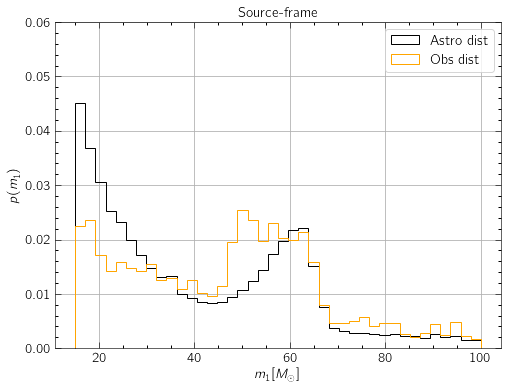

In [3]:
from marginal_plt import *

fig, ax = plt.subplots(figsize=(8,6))
ax.hist(m1s,bins=40,range=(15,100),density=True,histtype='step',label='Astro dist',color='black')
ax.hist(m1obs,bins=40,range=(15,100),density=True,histtype='step',label='Obs dist',color='orange')
ax.set_title('Source-frame',fontsize=14)
ax.set_ylabel(r'$p(m_1)$',fontsize=14)
ax.set_xlabel(r'$m_1 [M_{\odot}]$',fontsize=14)
ax.grid(True)
ax.legend(fontsize=14)
ax.set_ylim(0,0.06)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('srcm1.pdf',bbox_inches = 'tight')

Astro Dists: 100%|██████████████████████████| 1000/1000 [01:44<00:00,  9.54it/s]


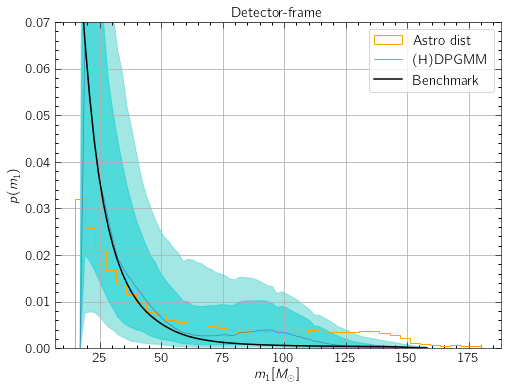

In [4]:
z_bds  = [0.01,1.3]
xlim = [15*(1+z_bds[0]), 160]
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(m1s*(1+zs),bins=40,range=(15,180),density=True,histtype='step',label='Astro dist',color='orange')
hdpgmm_plt(ax, pop_model, 3, benchmark= pop_true, plt_lim=xlim)
ax.set_title('Detector-frame',fontsize=14)
ax.set_ylabel(r'$p(m_1)$',fontsize=14)
ax.set_xlabel(r'$m_1 [M_{\odot}]$',fontsize=14)
ax.grid(True)
ax.legend(fontsize=14)
ax.set_ylim(0,0.07)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('detm1_'+str(int(xlim[0]))+'_'+str(int(xlim[1]))+'.pdf',bbox_inches = 'tight')

# $\uparrow$ Above is marginal det-frame m1 plot for $m_1^z \in (15M_{\odot},160M_{\odot}), ( m_1, q, \chi_{\mathrm{eff}})$ grid:  
## Benchmark pdf matches with HDPGMM's median but no second peak and doesnt match with hist data

Astro Dists: 100%|██████████████████████████| 1000/1000 [01:41<00:00,  9.83it/s]


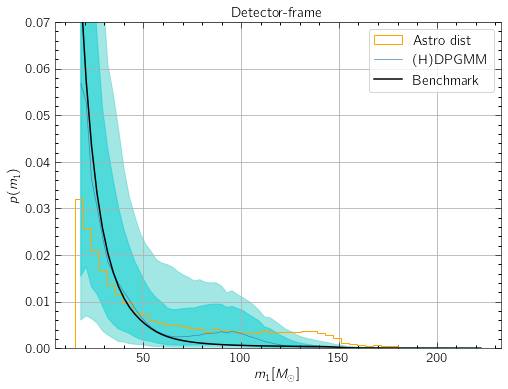

In [5]:
z_bds  = [0.01,1.3]
xlim = [15*(1+z_bds[0]),98*(1+z_bds[1])]
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(m1s*(1+zs),bins=40,range=(15,180),density=True,histtype='step',label='Astro dist',color='orange')
hdpgmm_plt(ax, pop_model, 3, benchmark= pop_true, plt_lim=xlim)
ax.set_title('Detector-frame',fontsize=14)
ax.set_ylabel(r'$p(m_1)$',fontsize=14)
ax.set_xlabel(r'$m_1 [M_{\odot}]$',fontsize=14)
ax.grid(True)
ax.legend(fontsize=14)
ax.set_ylim(0,0.07)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('detm1_'+str(int(xlim[0]))+'_'+str(int(xlim[1]))+'.pdf',bbox_inches = 'tight')

# $\uparrow$ Above is $m_1^z \in (15M_{\odot},225M_{\odot})$

Astro Dists: 100%|██████████████████████████| 1000/1000 [01:39<00:00, 10.04it/s]


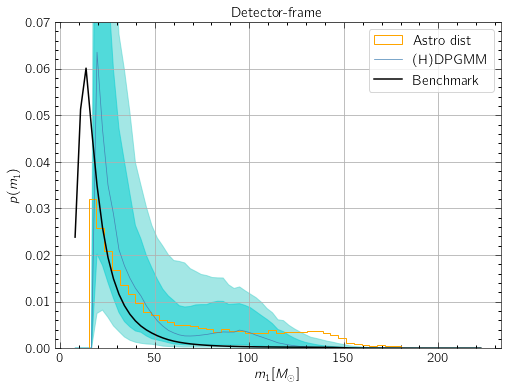

In [6]:
z_bds  = [0.01,1.3]
xlim = [5, 98*(1+z_bds[1])]
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(m1s*(1+zs),bins=40,range=(15,180),density=True,histtype='step',label='Astro dist',color='orange')
hdpgmm_plt(ax, pop_model, 3, benchmark= pop_true, plt_lim=xlim)
ax.set_title('Detector-frame',fontsize=14)
ax.set_ylabel(r'$p(m_1)$',fontsize=14)
ax.set_xlabel(r'$m_1 [M_{\odot}]$',fontsize=14)
ax.grid(True)
ax.legend(fontsize=14)
ax.set_ylim(0,0.07)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('detm1_'+str(int(xlim[0]))+'+_'+str(int(xlim[1]))+'.pdf',bbox_inches = 'tight')

# $\uparrow$ Above is marginal det-frame m1 plot $m_1^z \in (5M_{\odot},225M_{\odot}), ( m_1, q, \chi_{\mathrm{eff}})$ grid, no second peak:

Astro Dists: 100%|██████████████████████████| 1000/1000 [01:54<00:00,  8.74it/s]


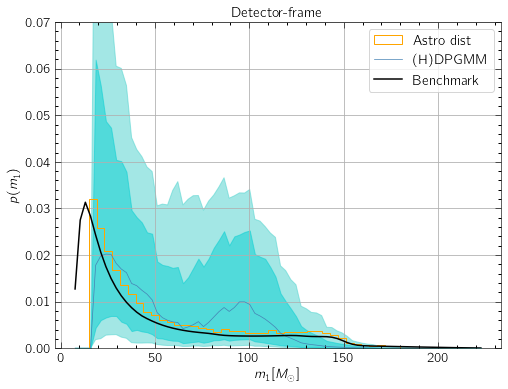

In [7]:
z_bds  = [0.01,1.3]
xlim = [5,98*(1+z_bds[1])]
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(m1s*(1+zs),bins=40,range=(15,180),density=True,histtype='step',label='Astro dist',color='orange')
hdpgmm_plt_regulargrid(ax, pop_model, 3, benchmark= pop_true, plt_lim=xlim)
ax.set_title('Detector-frame',fontsize=14)
ax.set_ylabel(r'$p(m_1)$',fontsize=14)
ax.set_xlabel(r'$m_1 [M_{\odot}]$',fontsize=14)
ax.grid(True)
ax.legend(fontsize=14)
ax.set_ylim(0,0.07)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('detm1_'+str(int(xlim[0]))+'_'+str(int(xlim[1]))+'_m1m2x.pdf',bbox_inches = 'tight')

# $\uparrow$ Above is marginal det-frame m1 plot $m_1^z \in (5M_{\odot},225M_{\odot}), ( m_1, m_2, \chi_{\mathrm{eff}})$ grid:
## Benchmark pdf matches with hist data: 